In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('../data/shopee_data.xlsx', sheet_name=None)
df_products = data['products']
df_shops = data['shops']


In [4]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   itemid                              792 non-null    int64  
 1   shopid                              792 non-null    int64  
 2   name                                792 non-null    object 
 3   brand                               792 non-null    object 
 4   condition                           792 non-null    int64  
 5   price_min                           792 non-null    int64  
 6   price_max                           792 non-null    int64  
 7   price                               792 non-null    int64  
 8   price_before_discount               792 non-null    int64  
 9   price_max_before_discount           792 non-null    int64  
 10  price_min_before_discount           792 non-null    int64  
 11  discount                            792 non-n

In [5]:
df_products.columns

Index(['itemid', 'shopid', 'name', 'brand', 'condition', 'price_min',
       'price_max', 'price', 'price_before_discount',
       'price_max_before_discount', 'price_min_before_discount', 'discount',
       'category_main', 'historical_sold', 'sold', 'rating', 'cmt_count',
       'liked_count', 'stock', 'ctime', 'image', 'total_rating_count',
       'rating_1_count', 'rating_2_count', 'rating_3_count', 'rating_4_count',
       'rating_5_count', 'product_age_days', 'Gaming', 'Jenis Garansi',
       'Masa Garansi', 'Tipe Earphone, Headphone & Headset', 'Tipe Koneksi'],
      dtype='object')

In [6]:
df_products=df_products.drop(columns=['name','condition','category_main'])

In [7]:
df_products=df_products.rename(columns={'rating': 'prod_rating', 'ctime': 'prod_ctime','prod_rating_count':'total_rating_count','rating_1_count':'prod_rating1_count','rating_2_count':'prod_rating2_count','rating_2_count':'prod_rating2_count','rating_3_count':'prod_rating3_count','rating_4_count':'prod_rating4_count','rating_5_count':'prod_rating5_count'})

In [8]:
df_products.columns

Index(['itemid', 'shopid', 'brand', 'price_min', 'price_max', 'price',
       'price_before_discount', 'price_max_before_discount',
       'price_min_before_discount', 'discount', 'historical_sold', 'sold',
       'prod_rating', 'cmt_count', 'liked_count', 'stock', 'prod_ctime',
       'image', 'total_rating_count', 'prod_rating1_count',
       'prod_rating2_count', 'prod_rating3_count', 'prod_rating4_count',
       'prod_rating5_count', 'product_age_days', 'Gaming', 'Jenis Garansi',
       'Masa Garansi', 'Tipe Earphone, Headphone & Headset', 'Tipe Koneksi'],
      dtype='object')

In [9]:
df_shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   shopid                 413 non-null    int64  
 1   name                   413 non-null    object 
 2   username               413 non-null    object 
 3   follower_count         413 non-null    int64  
 4   rating_star            413 non-null    float64
 5   rating_good            413 non-null    int64  
 6   rating_normal          413 non-null    int64  
 7   rating_bad             413 non-null    int64  
 8   response_rate          413 non-null    int64  
 9   response_time          413 non-null    int64  
 10  shop_location          413 non-null    object 
 11  is_verified            413 non-null    bool   
 12  is_official_shop       413 non-null    bool   
 13  is_preferred_plus      413 non-null    bool   
 14  has_shopee_flash_sale  413 non-null    bool   
 15  item_c

In [10]:
df_shops.columns

Index(['shopid', 'name', 'username', 'follower_count', 'rating_star',
       'rating_good', 'rating_normal', 'rating_bad', 'response_rate',
       'response_time', 'shop_location', 'is_verified', 'is_official_shop',
       'is_preferred_plus', 'has_shopee_flash_sale', 'item_count', 'ctime',
       'mtime', 'last_active_time', 'preparation_time', 'cancellation_rate',
       'region_name', 'province'],
      dtype='object')

In [11]:
df_shops=df_shops.drop(columns=['name','username','mtime','last_active_time','region_name','shop_location'])

In [12]:
df_shops=df_shops.rename(columns={'rating_star':'shop_rating','rating_good':'shop_rating_good','rating_normal':'shop_rating_normal','rating_bad':'shop_rating_bad','ctime':'shop_ctime'})

In [13]:
df_shops.columns

Index(['shopid', 'follower_count', 'shop_rating', 'shop_rating_good',
       'shop_rating_normal', 'shop_rating_bad', 'response_rate',
       'response_time', 'is_verified', 'is_official_shop', 'is_preferred_plus',
       'has_shopee_flash_sale', 'item_count', 'shop_ctime', 'preparation_time',
       'cancellation_rate', 'province'],
      dtype='object')

##Left Join Table

In [14]:
# merge
df_merged = df_products.merge(df_shops, on='shopid', how='left')

In [15]:
df_merged.columns

Index(['itemid', 'shopid', 'brand', 'price_min', 'price_max', 'price',
       'price_before_discount', 'price_max_before_discount',
       'price_min_before_discount', 'discount', 'historical_sold', 'sold',
       'prod_rating', 'cmt_count', 'liked_count', 'stock', 'prod_ctime',
       'image', 'total_rating_count', 'prod_rating1_count',
       'prod_rating2_count', 'prod_rating3_count', 'prod_rating4_count',
       'prod_rating5_count', 'product_age_days', 'Gaming', 'Jenis Garansi',
       'Masa Garansi', 'Tipe Earphone, Headphone & Headset', 'Tipe Koneksi',
       'follower_count', 'shop_rating', 'shop_rating_good',
       'shop_rating_normal', 'shop_rating_bad', 'response_rate',
       'response_time', 'is_verified', 'is_official_shop', 'is_preferred_plus',
       'has_shopee_flash_sale', 'item_count', 'shop_ctime', 'preparation_time',
       'cancellation_rate', 'province'],
      dtype='object')

## Feature Engineering

In [16]:
df_num=df_merged[['price_min', 'price_max', 'price',
       'price_before_discount', 'price_max_before_discount',
       'price_min_before_discount', 'discount', 'historical_sold', 'sold',
       'prod_rating', 'cmt_count', 'liked_count', 'stock',
        'total_rating_count', 'prod_rating1_count',
       'prod_rating2_count', 'prod_rating3_count', 'prod_rating4_count',
       'prod_rating5_count', 'product_age_days',
       'Masa Garansi',
       'follower_count', 'shop_rating', 'shop_rating_good',
       'shop_rating_normal', 'shop_rating_bad', 'response_rate',
       'response_time','item_count', 'shop_ctime', 'preparation_time',
       'cancellation_rate']]

### Categorical Feature

In [17]:
df_cat = df_merged[['Jenis Garansi','is_verified', 'is_official_shop', 'is_preferred_plus']].copy()

def get_shop_type(row):
    if row['is_official_shop'] == True:
        return "Shopee Mall"
    elif row['is_preferred_plus'] == True:
        return "Star+"
    elif row['is_verified'] == True:
        return "Verified"
    else:
        return "Regular"

df_cat['shop_type'] = df_cat.apply(get_shop_type, axis=1)

# hapus kolom asli
df_cat = df_cat.drop(['is_official_shop', 'is_preferred_plus','is_verified'], axis=1)


In [18]:
df_cat.head()

,Jenis Garansi,shop_type
0,tidak ada garansi,Shopee Mall
1,garansi pabrikan,Star+
2,garansi resmi,Shopee Mall
3,tidak ada garansi,Star+
4,garansi pabrikan,Shopee Mall


In [19]:
df_cat['Jenis Garansi'].unique()

array(['tidak ada garansi', 'garansi pabrikan', 'garansi resmi',
       'garansi penjual', 'garansi distributor'], dtype=object)

In [20]:
df_cat['Jenis Garansi'] = df_cat['Jenis Garansi'].replace({
    'tidak ada garansi': 'Tidak Bergaransi',
    'garansi pabrikan': 'Garansi Resmi',
    'garansi resmi': 'Garansi Resmi',
    'garansi distributor': 'Garansi Non-Resmi',
    'garansi penjual': 'Garansi Non-Resmi'
})


In [21]:
df_cat['Jenis Garansi'].unique()

array(['Tidak Bergaransi', 'Garansi Resmi', 'Garansi Non-Resmi'],
      dtype=object)

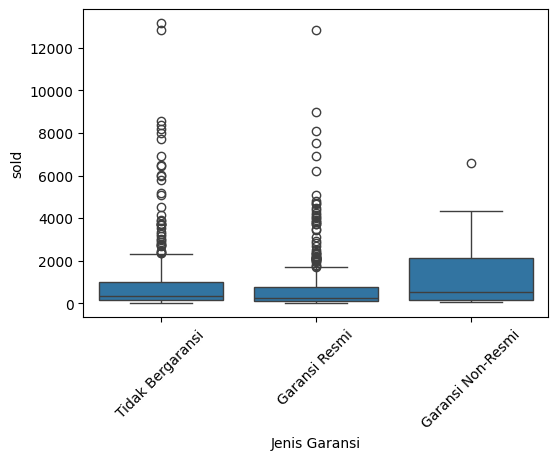

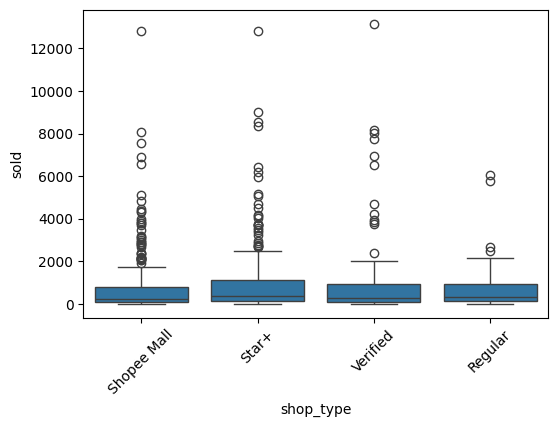

In [22]:
import seaborn as sns

df_cat_merged=pd.concat([df_cat,df_merged['sold']],axis=1)
for col in df_cat.columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(data=df_cat_merged, x=col, y="sold")
  plt.xticks(rotation=45)
  plt.show()


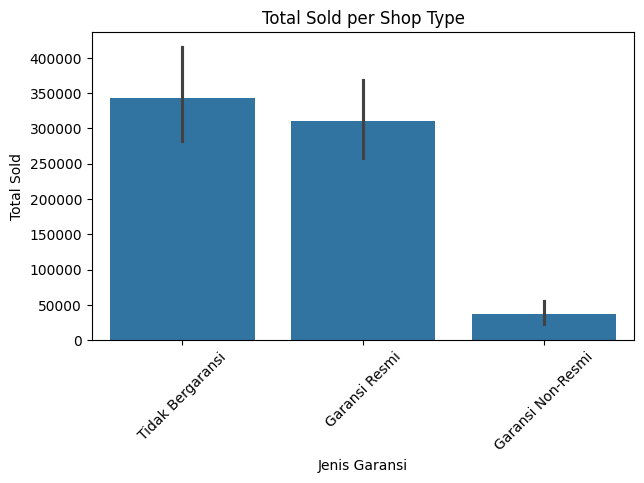

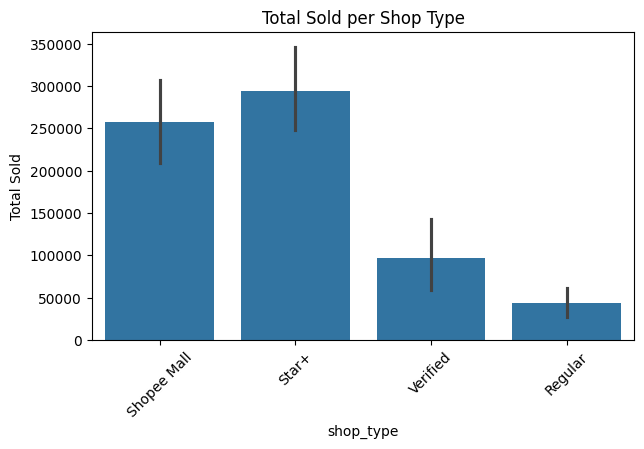

In [23]:
df_cat_merged=pd.concat([df_cat,df_merged['sold']],axis=1)
for col in df_cat.columns:
  plt.figure(figsize=(7,4))
  sns.barplot(
      data=df_cat_merged,
      x=col,
      y="sold",
      estimator=sum    # ⬅ total sold
  )
  plt.xticks(rotation=45)
  plt.ylabel("Total Sold")
  plt.title("Total Sold per Shop Type")
  plt.show()


In [24]:
df_cat_merged.groupby("shop_type")["sold"].describe()

,count,mean,std,min,25%,50%,75%,max
shop_type,,,,,,,,
Regular,54.0,797.814815,1208.282378,1.0,130.75,335.0,944.50,6034.0
Shopee Mall,348.0,739.652299,1329.784359,0.0,99.00,245.0,780.50,12838.0
Star+,312.0,942.442308,1522.143128,1.0,137.75,358.5,1103.75,12823.0
Verified,78.0,1237.564103,2400.371246,1.0,89.00,263.0,914.00,13155.0


In [25]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_cat.copy()

# Buat dictionary encoder biar bisa inverse_transform nanti
encoders = {}

for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    encoders[col] = le


In [26]:
df_encoded.head()

,Jenis Garansi,shop_type
0,2,1
1,1,2
2,1,1
3,2,2
4,1,1


### Numerical Feature

In [27]:
df_num.corr(method="spearman")['sold'].abs().sort_values(ascending=False)

sold                         1.000000
historical_sold              0.683735
cmt_count                    0.618711
total_rating_count           0.616802
prod_rating5_count           0.616196
prod_rating1_count           0.603042
prod_rating3_count           0.598643
prod_rating4_count           0.595687
prod_rating2_count           0.585108
liked_count                  0.467279
stock                        0.319100
shop_rating_bad              0.300920
shop_rating_normal           0.283034
price_min                    0.276485
price                        0.276485
shop_rating_good             0.247570
price_max                    0.230113
prod_rating                  0.173023
follower_count               0.168848
shop_rating                  0.167735
preparation_time             0.157223
price_min_before_discount    0.149351
price_before_discount        0.149351
discount                     0.125292
price_max_before_discount    0.115737
Masa Garansi                 0.080737
cancellation

In [28]:
df_num.columns

Index(['price_min', 'price_max', 'price', 'price_before_discount',
       'price_max_before_discount', 'price_min_before_discount', 'discount',
       'historical_sold', 'sold', 'prod_rating', 'cmt_count', 'liked_count',
       'stock', 'total_rating_count', 'prod_rating1_count',
       'prod_rating2_count', 'prod_rating3_count', 'prod_rating4_count',
       'prod_rating5_count', 'product_age_days', 'Masa Garansi',
       'follower_count', 'shop_rating', 'shop_rating_good',
       'shop_rating_normal', 'shop_rating_bad', 'response_rate',
       'response_time', 'item_count', 'shop_ctime', 'preparation_time',
       'cancellation_rate'],
      dtype='object')

In [29]:
def showHeatMap(corr):
  plt.figure(figsize=(10, 8))
  plt.imshow(corr, interpolation='nearest')
  plt.title("Spearman Correlation Heatmap")
  plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
  plt.yticks(np.arange(len(corr.columns)), corr.columns)

  # tampilkan nilai korelasi di dalam heatmap
  for i in range(len(corr.columns)):
      for j in range(len(corr.columns)):
          plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                  ha="center", va="center", fontsize=7)

  plt.colorbar()
  plt.tight_layout()
  plt.show()


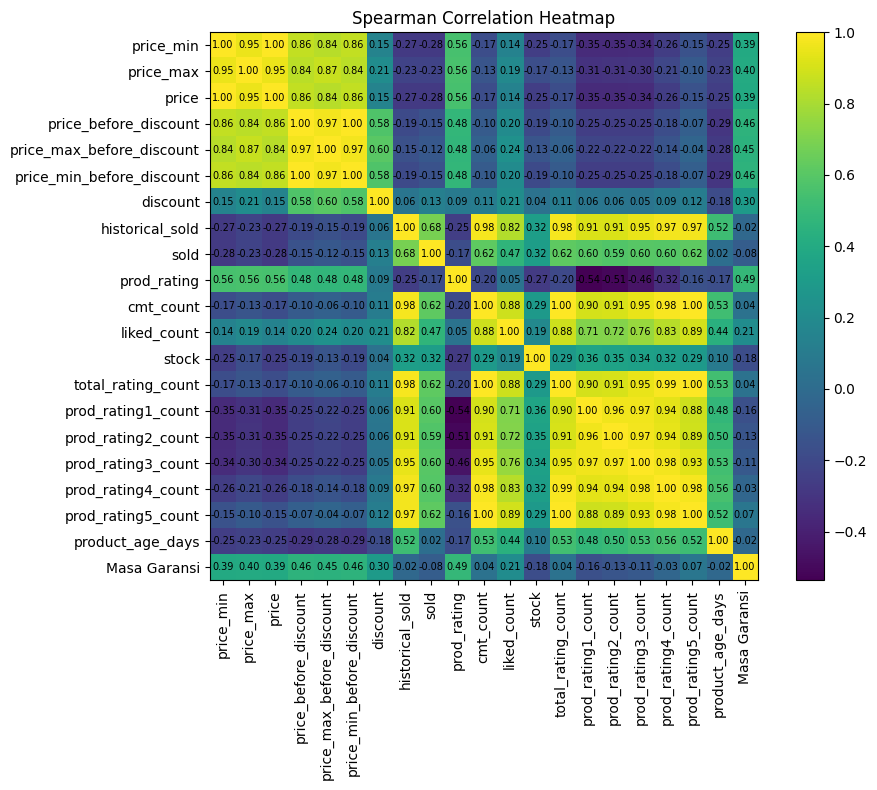

In [30]:
showHeatMap(df_num[['price_min', 'price_max', 'price', 'price_before_discount',
       'price_max_before_discount', 'price_min_before_discount', 'discount',
       'historical_sold', 'sold', 'prod_rating', 'cmt_count', 'liked_count',
       'stock', 'total_rating_count', 'prod_rating1_count',
       'prod_rating2_count', 'prod_rating3_count', 'prod_rating4_count',
       'prod_rating5_count', 'product_age_days', 'Masa Garansi',
       ]].corr(method='spearman'))

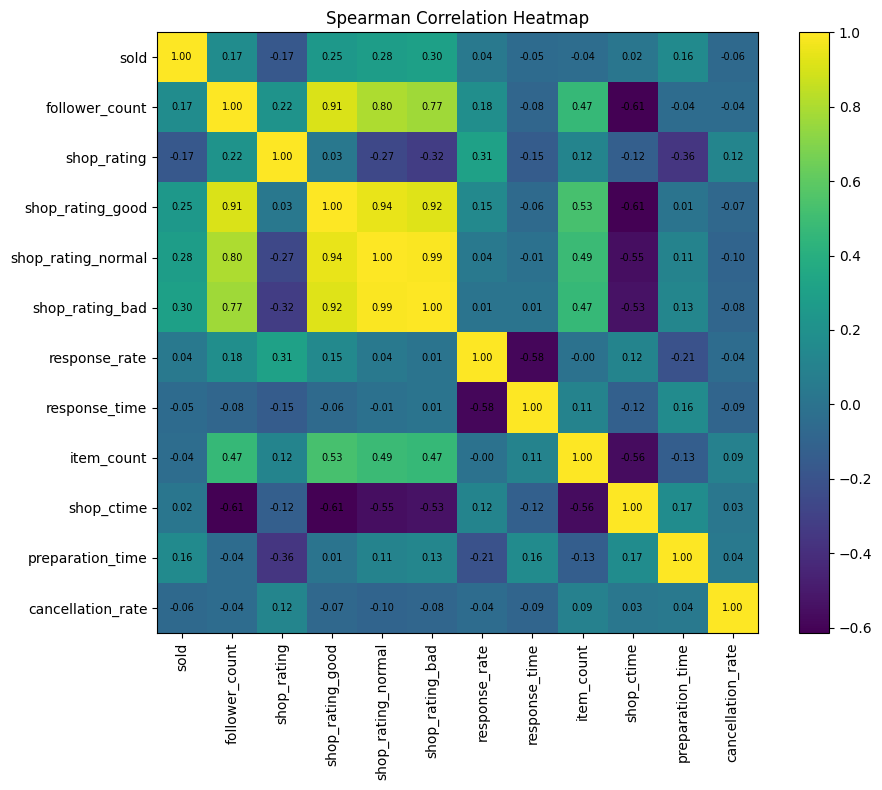

In [31]:
showHeatMap(df_num[['sold','follower_count', 'shop_rating', 'shop_rating_good',
       'shop_rating_normal', 'shop_rating_bad', 'response_rate',
       'response_time', 'item_count', 'shop_ctime', 'preparation_time',
       'cancellation_rate']].corr(method='spearman'))

In [54]:
corr = df_num.corr(method='spearman')

corr_sorted = (
    corr['sold']
    .sort_values(ascending=False)
    .to_frame(name='Spearman Correlation')
)

corr_sorted

,Spearman Correlation
sold,1.000000
cmt_count,0.618711
total_rating_count,0.616802
prod_rating5_count,0.616196
prod_rating1_count,0.603042
prod_rating3_count,0.598643
prod_rating4_count,0.595687
prod_rating2_count,0.585108
liked_count,0.467279
stock,0.319100


In [32]:
df_num=df_num.drop(columns=['historical_sold','cancellation_rate','product_age_days'])

In [33]:
filter_num_column=['price', 'discount',
       'sold', 'prod_rating', 'cmt_count', 'liked_count',
       'stock', 'total_rating_count', 'prod_rating1_count',
       'prod_rating2_count', 'prod_rating3_count', 'prod_rating4_count',
       'prod_rating5_count', 'Masa Garansi',
       'follower_count', 'shop_rating', 'shop_rating_good',
        'shop_rating_bad', 'response_rate',
       'response_time', 'item_count', 'shop_ctime', 'preparation_time']

In [34]:
df_new_num=df_num[filter_num_column]

## EDA

### Histogram

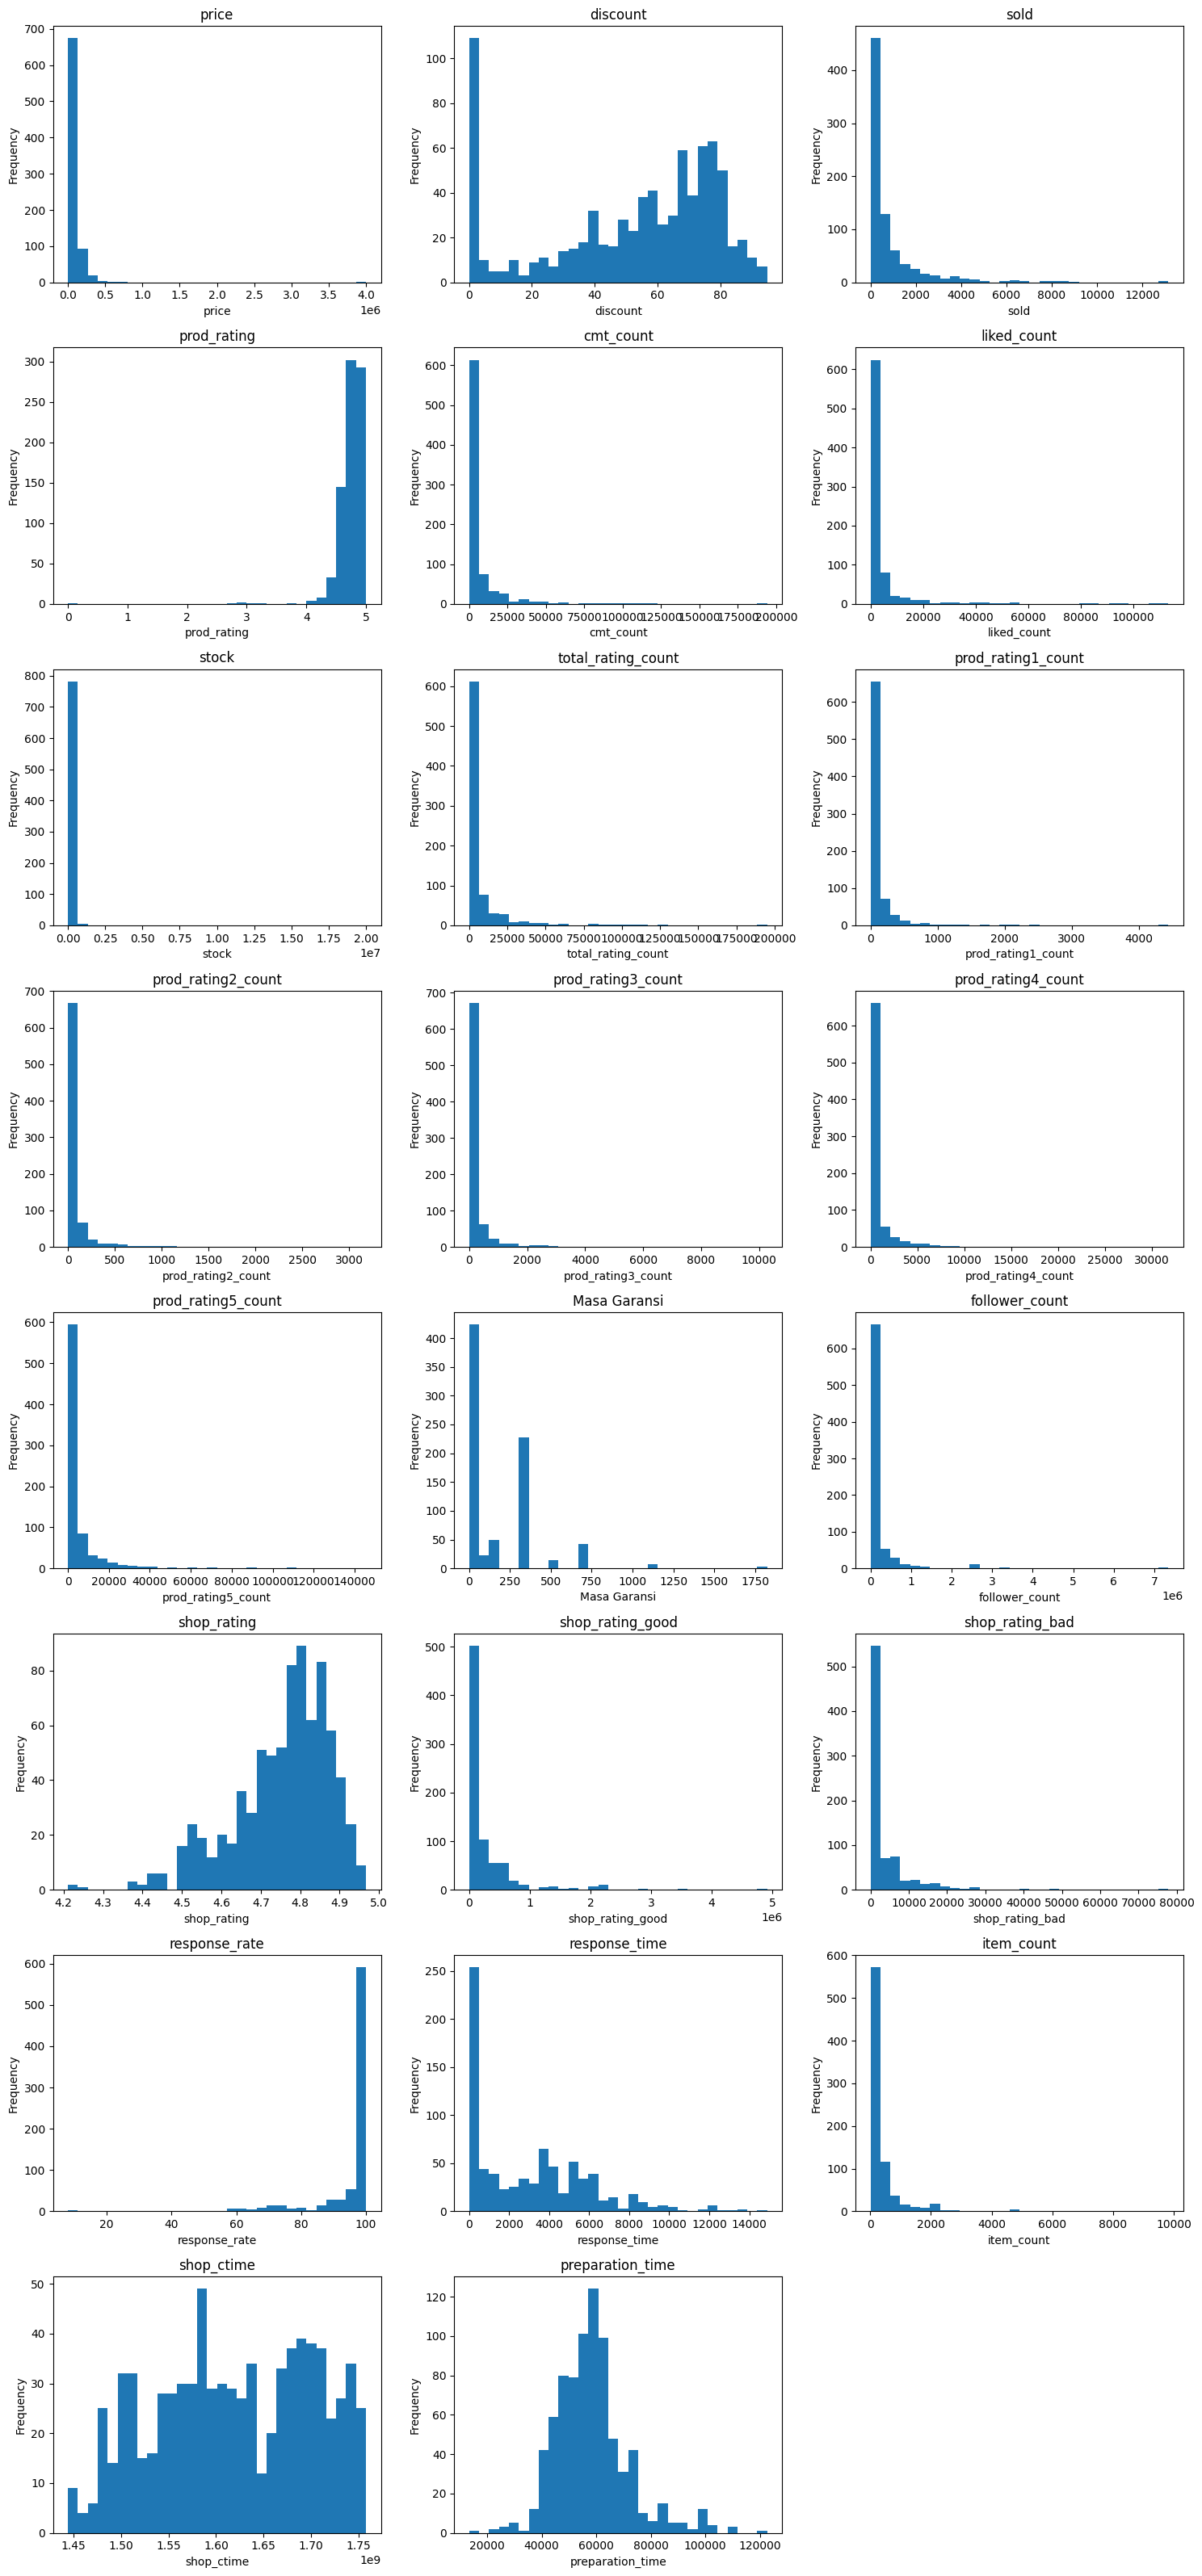

In [51]:
import math
import matplotlib.pyplot as plt

num_cols = df_new_num.select_dtypes(include='number').columns
n_cols = 3  # jumlah kolom grid
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df_new_num[col], bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# hapus subplot kosong kalau ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [52]:
# for col in df_new_num.select_dtypes(include='number').columns:
#     plt.figure(figsize=(6,4))
#     df_new_num[col].hist(bins=30)
#     plt.title(f'Histogram of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()


### Boxplot

In [53]:
# import seaborn as sns

# for col in df_new_num.columns:
#     plt.figure(figsize=(6,4))
#     sns.boxplot(x=df_new_num[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

### Scatter Plot

In [37]:
# for col in df_new_num.drop(columns=['sold']).columns:
#   plt.figure(figsize=(6,4))
#   plt.scatter(df_new_num[col], df_new_num['sold'], alpha=0.5)
#   plt.xlabel(col)
#   plt.ylabel('sold')
#   plt.title(f'{col} vs Sold')
#   plt.show()



## Feature Selection

In [38]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data


C:\Users\erick\AppData\Local\Temp\ipykernel_9364\2306303460.py:17: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')


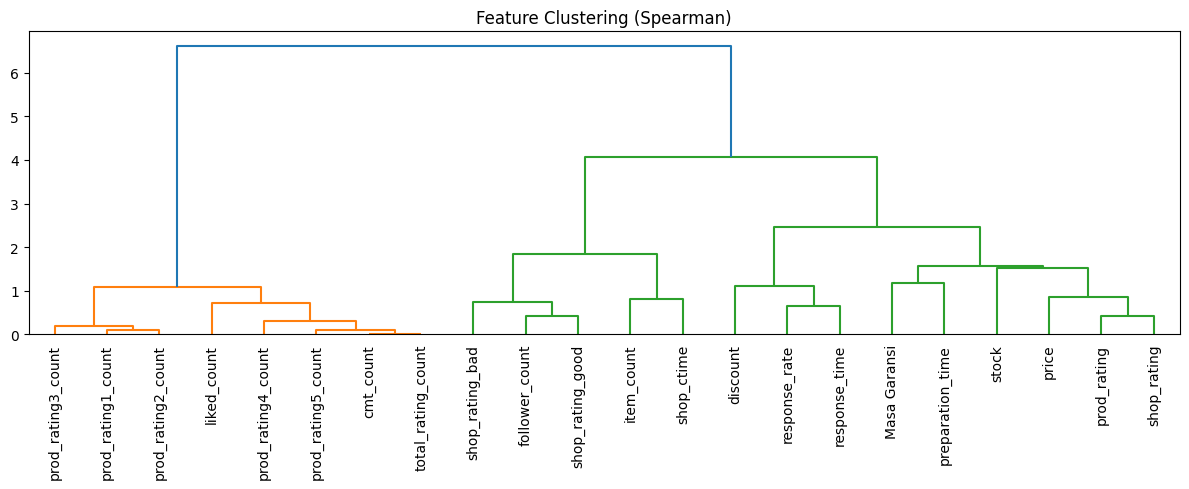

               feature  cluster
0                price       13
1             discount        9
2          prod_rating       12
3            cmt_count        2
4          liked_count        3
5                stock       14
6   total_rating_count        2
7   prod_rating1_count        1
8   prod_rating2_count        1
9   prod_rating3_count        1
10  prod_rating4_count        2
11  prod_rating5_count        2
12        Masa Garansi       10
13      follower_count        4
14         shop_rating       12
15    shop_rating_good        4
16     shop_rating_bad        5
17       response_rate        8
18       response_time        8
19          item_count        6
20          shop_ctime        7
21    preparation_time       11

Selected features:
['prod_rating1_count', 'cmt_count', 'liked_count', 'follower_count', 'shop_rating_bad', 'item_count', 'shop_ctime', 'response_rate', 'discount', 'Masa Garansi', 'preparation_time', 'prod_rating', 'price', 'stock']


In [39]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# ===== STEP 0: Pisahkan target =====
target = "sold"          # ganti kalau beda
X = df_new_num.drop(columns=[target])

# ===== STEP 1: Spearman correlation =====
corr = X.corr(method='spearman').abs()

# ===== STEP 2: Distance matrix =====
distance_matrix = 1 - corr

# ===== STEP 3: Hierarchical clustering =====
Z = linkage(distance_matrix, method='ward')

# ===== (Opsional) Plot dendrogram =====
plt.figure(figsize=(12, 5))
dendrogram(Z, labels=X.columns, leaf_rotation=90)
plt.title("Feature Clustering (Spearman)")
plt.tight_layout()
plt.show()

# ===== STEP 4: Assign cluster =====
clusters = fcluster(Z, t=0.7, criterion='distance')

cluster_df = pd.DataFrame({
    "feature": X.columns,
    "cluster": clusters
})

print(cluster_df)

# ===== STEP 5: Pick 1 feature per cluster =====
selected_features = cluster_df.groupby("cluster")["feature"].first().tolist()

print("\nSelected features:")
print(selected_features)


In [40]:
selected_features

['prod_rating1_count',
 'cmt_count',
 'liked_count',
 'follower_count',
 'shop_rating_bad',
 'item_count',
 'shop_ctime',
 'response_rate',
 'discount',
 'Masa Garansi',
 'preparation_time',
 'prod_rating',
 'price',
 'stock']

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df_num[selected_features]
calculate_vif(X)

,feature,VIF
0,prod_rating1_count,2.577148
1,cmt_count,6.022155
2,liked_count,3.815530
3,follower_count,1.469098
4,shop_rating_bad,1.800517
5,item_count,1.611010
6,shop_ctime,271.210972
7,response_rate,112.777775
8,discount,6.012976
9,Masa Garansi,1.948078


In [42]:
from sklearn.model_selection import train_test_split
target='sold'
# X = pd.concat([df_new_num.drop(columns='sold'),df_cat],axis=1)
X = pd.concat([df_num[selected_features],df_cat],axis=1)
y = df_merged[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [43]:
X

,prod_rating1_count,cmt_count,liked_count,follower_count,shop_rating_bad,item_count,shop_ctime,response_rate,discount,Masa Garansi,preparation_time,prod_rating,price,stock,Jenis Garansi,shop_type
0,0,176,418,4864,1043,154,1459514205,94,25,30,70945,4.846591,75000,69,Tidak Bergaransi,Shopee Mall
1,166,21829,6692,14397,578,112,1637031500,99,64,90,48601,4.835409,47500,81042,Garansi Resmi,Star+
2,0,20,8,34689,83,589,1682757452,100,56,720,52714,4.850000,52499,829,Garansi Resmi,Shopee Mall
3,50,2702,1165,616445,77823,211,1466995546,97,72,0,46168,4.644625,27999,642,Tidak Bergaransi,Star+
4,10,950,333,904580,6932,196,1562643124,100,75,360,55371,4.834737,29900,1813,Garansi Resmi,Shopee Mall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,2,157,135,159957,6151,928,1623139368,100,72,0,71788,4.796178,11300,0,Tidak Bergaransi,Regular
788,1,228,184,159957,6151,928,1623139368,100,64,0,71788,4.868421,35999,489,Tidak Bergaransi,Regular
789,0,28,46,4163,98,112,1699414497,100,64,0,66161,4.892857,18502,11041,Tidak Bergaransi,Star+
790,0,18,21,4839,96,117,1675836707,100,64,0,72337,4.944444,18690,3972,Tidak Bergaransi,Star+


In [44]:
from sklearn.preprocessing import OneHotEncoder

# 3. OHE untuk categorical
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# fit only on training
X_train_cat = ohe.fit_transform(X_train[df_cat.columns])
X_test_cat  = ohe.transform(X_test[df_cat.columns])

# 4. Konversi ke DataFrame agar kolom jelas
import pandas as pd

ohe_cols = ohe.get_feature_names_out(df_cat.columns)

X_train_cat_df = pd.DataFrame(X_train_cat, columns=ohe_cols, index=X_train.index)
X_test_cat_df  = pd.DataFrame(X_test_cat,  columns=ohe_cols, index=X_test.index)

# 5. Gabungkan kembali numeric + encoded categorical
X_train_final = pd.concat([X_train[selected_features], X_train_cat_df], axis=1)
X_test_final  = pd.concat([X_test[selected_features],  X_test_cat_df], axis=1)

# X_train_final = pd.concat([X_train[df_new_num.drop(columns='sold').columns], X_train_cat_df], axis=1)
# X_test_final  = pd.concat([X_test[df_new_num.drop(columns='sold').columns],  X_test_cat_df], axis=1)

In [45]:
X_train_final

,prod_rating1_count,cmt_count,liked_count,follower_count,shop_rating_bad,item_count,shop_ctime,response_rate,discount,Masa Garansi,...,prod_rating,price,stock,Jenis Garansi_Garansi Non-Resmi,Jenis Garansi_Garansi Resmi,Jenis Garansi_Tidak Bergaransi,shop_type_Regular,shop_type_Shopee Mall,shop_type_Star+,shop_type_Verified
342,37,5940,1419,68978,298,680,1600410807,98,74,0,...,4.808167,26000,2012,0.0,1.0,0.0,0.0,0.0,1.0,0.0
244,10,2105,704,8200,468,144,1696946285,100,32,0,...,4.806360,102500,193,0.0,0.0,1.0,0.0,0.0,1.0,0.0
314,0,7,30,1226,53,101,1732691226,100,52,0,...,5.000000,309000,300,0.0,0.0,1.0,0.0,1.0,0.0,0.0
727,1,239,174,109862,1960,1052,1589024832,100,57,360,...,4.895397,127900,28,0.0,1.0,0.0,0.0,1.0,0.0,0.0
691,387,15688,4757,232065,17214,201,1516263084,99,77,0,...,4.543814,23300,767993,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,64,8058,1748,586276,1909,51,1606721170,100,80,360,...,4.842989,9900,1250,0.0,1.0,0.0,0.0,1.0,0.0,0.0
106,2,617,301,51745,1046,194,1528979748,99,11,180,...,4.893891,73499,65,0.0,1.0,0.0,0.0,0.0,1.0,0.0
270,832,35950,7597,85192,10485,629,1550809457,100,48,0,...,4.604840,7010,356073,0.0,0.0,1.0,0.0,0.0,1.0,0.0
435,130,1465,298,77419,7773,2176,1637763787,99,0,0,...,4.264586,27999,8305,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [46]:
from sklearn.ensemble import RandomForestRegressor

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_final, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
model.score(X_test_final,y_test)

0.26834775383964105

In [48]:
from sklearn.inspection import permutation_importance
# Permutation Feature Importance
pfi = permutation_importance(model, X_test_final, y_test,
                             n_repeats=10, random_state=42)

# Ranking importance
perm_imp_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Permutation Importance': pfi.importances_mean
}).sort_values('Permutation Importance', ascending=False)

print(perm_imp_df)

                            Feature  Permutation Importance
1                         cmt_count                0.413796
0                prod_rating1_count                0.175796
3                    follower_count                0.111677
6                        shop_ctime                0.082388
11                      prod_rating                0.070947
12                            price                0.048550
10                 preparation_time                0.047813
7                     response_rate                0.007004
13                            stock                0.006806
9                      Masa Garansi                0.005700
18            shop_type_Shopee Mall                0.003243
15      Jenis Garansi_Garansi Resmi                0.002405
2                       liked_count                0.001256
17                shop_type_Regular                0.000555
14  Jenis Garansi_Garansi Non-Resmi                0.000063
16   Jenis Garansi_Tidak Bergaransi     

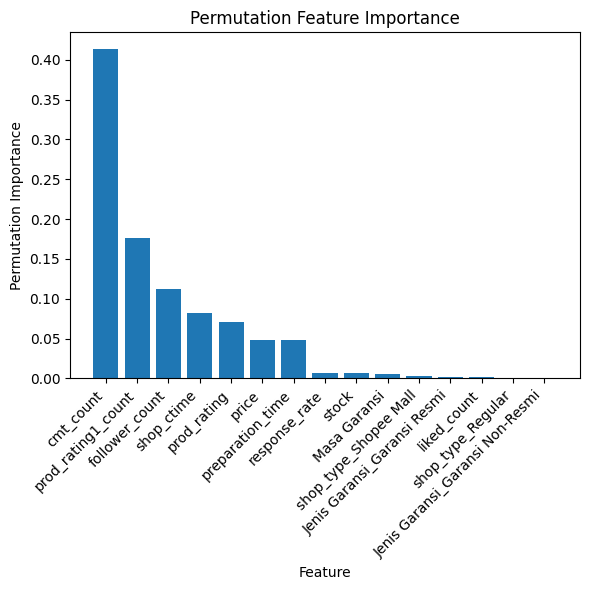

In [49]:
plt.figure(figsize=(6, 6))
plt.bar(perm_imp_df.loc[perm_imp_df['Permutation Importance']>0,'Feature'], perm_imp_df.loc[perm_imp_df['Permutation Importance']>0,'Permutation Importance'])
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [50]:
df_shops.columns

Index(['shopid', 'follower_count', 'shop_rating', 'shop_rating_good',
       'shop_rating_normal', 'shop_rating_bad', 'response_rate',
       'response_time', 'is_verified', 'is_official_shop', 'is_preferred_plus',
       'has_shopee_flash_sale', 'item_count', 'shop_ctime', 'preparation_time',
       'cancellation_rate', 'province'],
      dtype='object')